# PRIM on the Hamarat et al. 2013 Model

In [1]:
from ema_workbench import load_results
from ema_workbench.analysis.cart import CART

from notebook_helpers.plot_outcomes_lineplot_gaussian import plot_fraction_renewables
from notebook_helpers.clean_hamarat import clean_results
from notebook_helpers.cart_vis_and_print import build_custom_tree, prune_custom_tree, visualize_cart_tree, generate_cart_summary
from src.config.paths import HAMARAT_DATA_DIR

## Load and Clean Hamarat Model

In [2]:
# Load results
experiments, outcomes = load_results(HAMARAT_DATA_DIR / "10000_lhs_2010_2050.tar.gz")

# Clean data → get X and y
X, y_continuous = clean_results(experiments, outcomes)

 ## Plot the Data and Apply Threshold
 
We first plot the data with the threshold to visualise the fraction of renewables over time, and how the threshold impacts the selected target scenario.

Figure saved: renewables_over_time_0_6_threshold.pdf


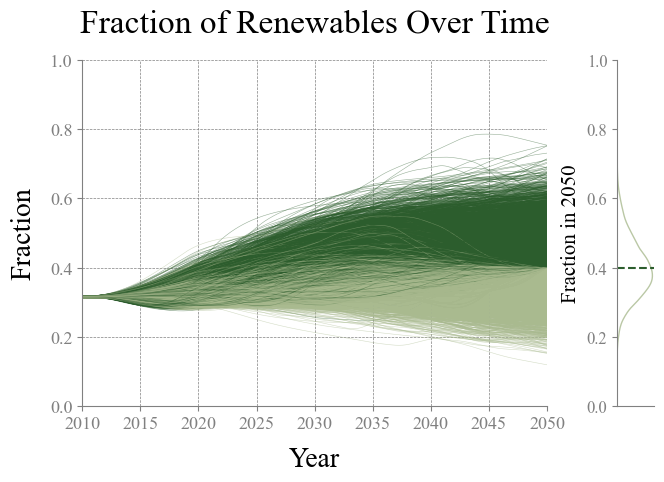


At threshold of 40.0% renewables by 2050:
   → 46.4% of cases exceed threshold (4637 of 10000)
   → 53.6% of cases fall below threshold (5363 of 10000)


In [3]:
plot_fraction_renewables(outcomes, threshold=0.4, save_path="renewables_over_time_0_6_threshold.pdf")

We then apply the threshold to y to create a binary target variable.

In [4]:
threshold_value = 0.4  # for example
y = (y_continuous > threshold_value).astype(int)

# Running CART

In [5]:
# Minimum mass for a box to be considered valid
mass_min = 0.05

# Run CART
cart_alg = CART(X, y, mass_min=mass_min)
cart_alg.build_tree()

In [6]:
cart_alg.stats

[{'coverage': np.float64(0.06555962907051974),
  'density': np.float64(0.6816143497757847),
  'res dim': 4,
  'mass': 0.0446},
 {'coverage': np.float64(0.07246064265689023),
  'density': np.float64(0.8421052631578947),
  'res dim': 4,
  'mass': 0.0399},
 {'coverage': np.float64(0.14017683847315074),
  'density': np.float64(0.7710557532621589),
  'res dim': 4,
  'mass': 0.0843},
 {'coverage': np.float64(0.07289195600603839),
  'density': np.float64(0.5152439024390244),
  'res dim': 5,
  'mass': 0.0656},
 {'coverage': np.float64(0.07547983610092733),
  'density': np.float64(0.693069306930693),
  'res dim': 5,
  'mass': 0.0505},
 {'coverage': np.float64(0.34785421608798794),
  'density': np.float64(0.605026256564141),
  'res dim': 3,
  'mass': 0.2666},
 {'coverage': np.float64(0.3931421177485443),
  'density': np.float64(0.5486006620523624),
  'res dim': 3,
  'mass': 0.3323},
 {'coverage': np.float64(0.3931421177485443),
  'density': np.float64(0.5486006620523624),
  'res dim': 3,
  'mass

## Visualise the CART Tree

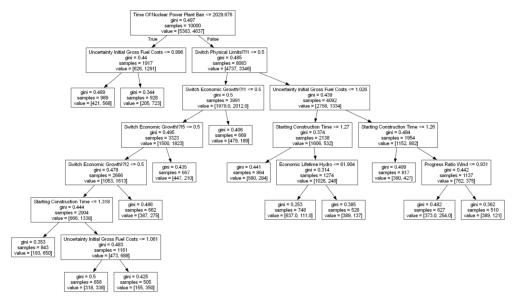

In [7]:
fig = cart_alg.show_tree()

In [8]:
# 1. Build our custom tree from the original CART model
print("\n[1] Building custom tree from original CART model...")
custom_tree = build_custom_tree(cart_alg)


[1] Building custom tree from original CART model...


In [9]:
# 2. Visualize and summarize the ORIGINAL tree
print("\n[2] Visualizing and summarizing the ORIGINAL tree...")
visualize_cart_tree(custom_tree, title="Original CART Tree on EU Energy Case", save=True, save_path="data/cart/original_tree_eu_energy_case.pdf")
generate_cart_summary(custom_tree, save=True, save_path="data/cart/original_summary.txt")


[2] Visualizing and summarizing the ORIGINAL tree...
Formatted CART tree saved to: data/cart/original_tree_eu_energy_case.pdf
# CART Scenarios Summary (class 1, Density > 0.5)

=== Combined Statistics (for shown scenarios) ===
Combined coverage: 0.659
Combined density:  0.645

=== Individual Scenarios (Density > 0.5) ===

Scenario 1 (Original Box ID 2):
  Coverage: 0.122
  Density:  0.574
  Bounds:
    Time Of Nuclear Power Plant Ban: [2013.002, 2029.676]
    Uncertainty Initial Gross Fuel Costs: [0.500, 0.996]

Scenario 2 (Original Box ID 3):
  Coverage: 0.156
  Density:  0.779
  Bounds:
    Time Of Nuclear Power Plant Ban: [2013.002, 2029.676]
    Uncertainty Initial Gross Fuel Costs: [0.996, 1.500]

Scenario 3 (Original Box ID 9):
  Coverage: 0.140
  Density:  0.771
  Bounds:
    Starting Construction Time: [0.100, 1.318]
    Switch Economic Growth: categories = [3, 4, 6]
    Switch Physical Limits: categories = [2]
    Time Of Nuclear Power Plant Ban: [2029.676, 2099.999]

Scenari

'# CART Scenarios Summary (class 1, Density > 0.5)\n\n=== Combined Statistics (for shown scenarios) ===\nCombined coverage: 0.659\nCombined density:  0.645\n\n=== Individual Scenarios (Density > 0.5) ===\n\nScenario 1 (Original Box ID 2):\n  Coverage: 0.122\n  Density:  0.574\n  Bounds:\n    Time Of Nuclear Power Plant Ban: [2013.002, 2029.676]\n    Uncertainty Initial Gross Fuel Costs: [0.500, 0.996]\n\nScenario 2 (Original Box ID 3):\n  Coverage: 0.156\n  Density:  0.779\n  Bounds:\n    Time Of Nuclear Power Plant Ban: [2013.002, 2029.676]\n    Uncertainty Initial Gross Fuel Costs: [0.996, 1.500]\n\nScenario 3 (Original Box ID 9):\n  Coverage: 0.140\n  Density:  0.771\n  Bounds:\n    Starting Construction Time: [0.100, 1.318]\n    Switch Economic Growth: categories = [3, 4, 6]\n    Switch Physical Limits: categories = [2]\n    Time Of Nuclear Power Plant Ban: [2029.676, 2099.999]\n\nScenario 4 (Original Box ID 11):\n  Coverage: 0.073\n  Density:  0.515\n  Bounds:\n    Starting Constr

In [10]:
# 3. Prune our custom tree repeatedly until no more changes are made
print("\n[3] Pruning the custom tree...")
while prune_custom_tree(custom_tree, target_class=1):
    print("  - Pruning pass completed, re-running to check for more opportunities...")
print("Pruning finished.")


[3] Pruning the custom tree...
  - Pruning pass completed, re-running to check for more opportunities...
Pruning finished.


In [11]:
# 4. Visualize and summarize the FINAL PRUNED tree
print("\n[4] Visualizing and summarizing the PRUNED tree...")
visualize_cart_tree(custom_tree, title="Pruned CART Tree on EU Energy Case", save=True, save_path="data/cart/pruned_tree_eu_energy_case.pdf")
generate_cart_summary(custom_tree, save=True, save_path="data/cart/pruned_summary.txt")


[4] Visualizing and summarizing the PRUNED tree...
Formatted CART tree saved to: data/cart/pruned_tree_eu_energy_case.pdf
# CART Scenarios Summary (class 1, Density > 0.5)

=== Combined Statistics (for shown scenarios) ===
Combined coverage: 0.659
Combined density:  0.645

=== Individual Scenarios (Density > 0.5) ===

Scenario 1 (Original Box ID 1):
  Coverage: 0.278
  Density:  0.673
  Bounds:
    Time Of Nuclear Power Plant Ban: [2013.002, 2029.676]

Scenario 2 (Original Box ID 8):
  Coverage: 0.289
  Density:  0.668
  Bounds:
    Switch Economic Growth: categories = [3, 4, 6]
    Switch Physical Limits: categories = [2]
    Time Of Nuclear Power Plant Ban: [2029.676, 2099.999]

Scenario 9 (Original Box ID 23):
  Coverage: 0.092
  Density:  0.523
  Bounds:
    Starting Construction Time: [0.100, 1.260]
    Switch Economic Growth: categories = [3, 4, 6]
    Switch Physical Limits: categories = [2]
    Time Of Nuclear Power Plant Ban: [2029.676, 2099.999]
    Uncertainty Initial Gross

'# CART Scenarios Summary (class 1, Density > 0.5)\n\n=== Combined Statistics (for shown scenarios) ===\nCombined coverage: 0.659\nCombined density:  0.645\n\n=== Individual Scenarios (Density > 0.5) ===\n\nScenario 1 (Original Box ID 1):\n  Coverage: 0.278\n  Density:  0.673\n  Bounds:\n    Time Of Nuclear Power Plant Ban: [2013.002, 2029.676]\n\nScenario 2 (Original Box ID 8):\n  Coverage: 0.289\n  Density:  0.668\n  Bounds:\n    Switch Economic Growth: categories = [3, 4, 6]\n    Switch Physical Limits: categories = [2]\n    Time Of Nuclear Power Plant Ban: [2029.676, 2099.999]\n\nScenario 9 (Original Box ID 23):\n  Coverage: 0.092\n  Density:  0.523\n  Bounds:\n    Starting Construction Time: [0.100, 1.260]\n    Switch Economic Growth: categories = [3, 4, 6]\n    Switch Physical Limits: categories = [2]\n    Time Of Nuclear Power Plant Ban: [2029.676, 2099.999]\n    Uncertainty Initial Gross Fuel Costs: [1.026, 1.500]'